In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use("default")

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

In [ ]:
# enable this to read dataset from url
# polluted_df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
# polluted_df

In [3]:
# enable this to read the data locally
polluted_df = pd.read_csv("datasets/polluted_cities.csv")
polluted_df

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
495,495,496,Poland,Lublin,2016,27,>75%,31,>75%,2018
496,496,497,Poland,Siedlce,2016,27,>75%,29,>75%,2018
497,497,498,Poland,Trzebinia,2016,27,>75%,35,>75%,2018
498,498,499,El Salvador,San Salvador,2016,27,50% -< 75%,59,NaN,2018


In [4]:
# converting year to datetime dtype
polluted_df["Year"] = pd.to_datetime(polluted_df["Year"], format="%Y").dt.year

In [9]:
china_series = polluted_df[polluted_df["Country"] == "China"]
iran_series = polluted_df[polluted_df["Country"] == "Iran"]

In [10]:
china_series = china_series.groupby("Year")["PM2.5"].sum()
china_series

Year
2014     2725
2015      425
2016    11106
Name: PM2.5, dtype: int64

In [11]:
iran_series = iran_series.groupby("Year")["PM2.5"].sum()
iran_series

Year
2012      37
2013      66
2014      31
2016    1453
Name: PM2.5, dtype: int64

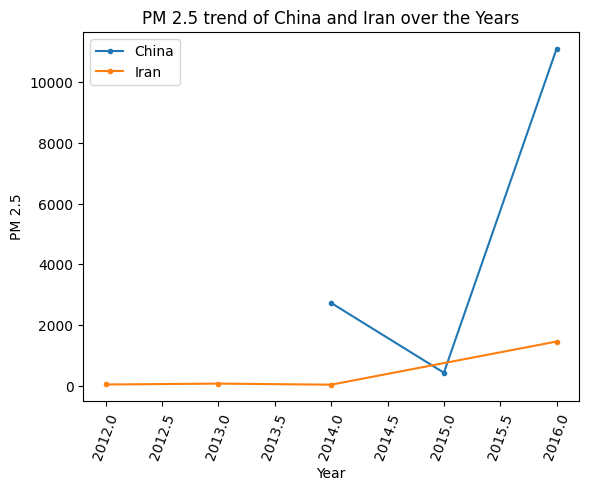

In [20]:
plt.plot(china_series.index, china_series, marker=".", label="China")
plt.plot(iran_series.index, iran_series, marker=".", label="Iran")
plt.xticks(rotation=70)
plt.xlabel("Year")
plt.ylabel("PM 2.5")
plt.title("PM 2.5 trend of China and Iran over the Years")
# plt.xticks(polluted_df['Year'].value_counts().index)
plt.legend()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

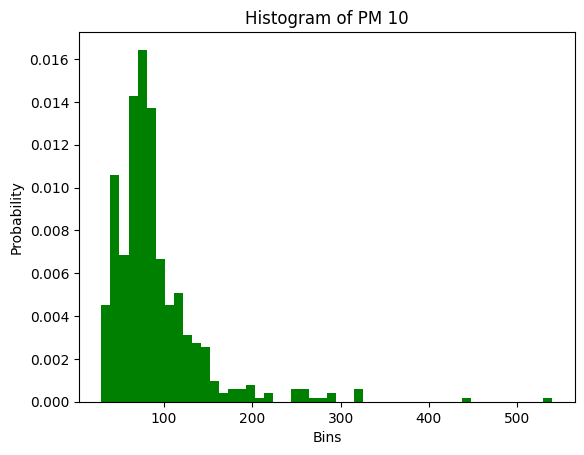

In [30]:
plt.hist(polluted_df["PM10"], density=True, bins=50, facecolor="green")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.title("Histogram of PM 10")
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

In [31]:
chile_df = polluted_df[polluted_df["Country"] == "Chile"]
chile_df.sample(5)

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
372,372,373,Chile,Linares,2016,32,NaN,65,NaN,2018
475,475,476,Chile,Puerto Montt,2016,27,NaN,55,NaN,2018
394,394,395,Chile,Cerrillos,2016,31,NaN,66,NaN,2018
190,190,191,Chile,Padre Las Casas,2016,49,NaN,64,NaN,2018
450,450,451,Chile,Rancagua,2016,28,NaN,68,NaN,2018


In [32]:
poland_df = polluted_df[polluted_df["Country"] == "Poland"]
poland_df.sample(5)

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
425,425,426,Poland,Katowice,2016,30,>75%,41,>75%,2018
405,405,406,Poland,Nowy Sącz,2016,31,>75%,41,>75%,2018
472,472,473,Poland,Tarnowskie Góry,2016,28,>75%,38,>75%,2018
493,493,494,Poland,Kalisz,2016,27,>75%,33,>75%,2018
492,492,493,Poland,Chełm,2015,27,>75%,35,>75%,2018


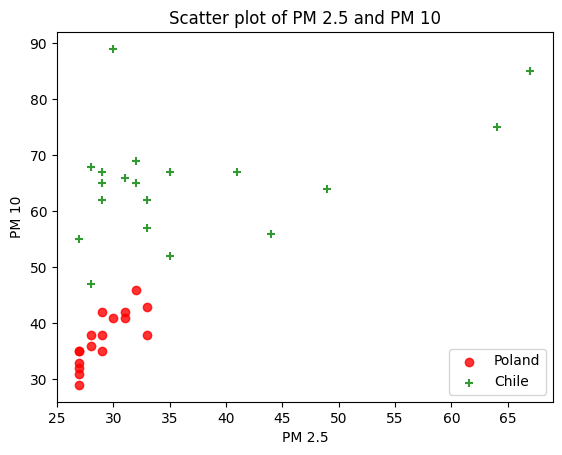

In [48]:
plt.scatter(
    poland_df["PM2.5"],
    poland_df["PM10"],
    marker="o",
    color="red",
    alpha=0.8,
    label="Poland",
)
plt.scatter(
    chile_df["PM2.5"],
    chile_df["PM10"],
    marker="+",
    color="green",
    alpha=0.8,
    label="Chile",
)
plt.xlabel("PM 2.5")
plt.ylabel("PM 10")
plt.title("Scatter plot of PM 2.5 and PM 10")
plt.legend()
plt.show()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

In [49]:
top5countries = polluted_df["Country"].value_counts().head()
top5countries

Country
China     283
Iran       43
India      32
Chile      19
Poland     17
Name: count, dtype: int64

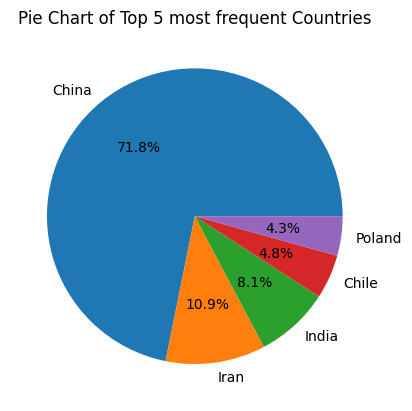

In [50]:
plt.pie(top5countries, labels=top5countries.index, autopct="%0.1f%%")
plt.title("Pie Chart of Top 5 most frequent Countries")
plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.

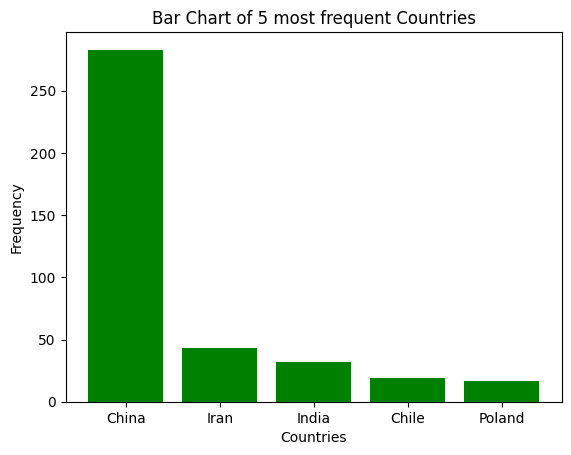

In [52]:
plt.bar(top5countries.index, top5countries, color="green")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.title("Bar Chart of 5 most frequent Countries")
plt.show()

## `Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.

### `Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

In [53]:
# code here
sales_df = pd.read_csv("datasets/company_sales_data.csv")
sales_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


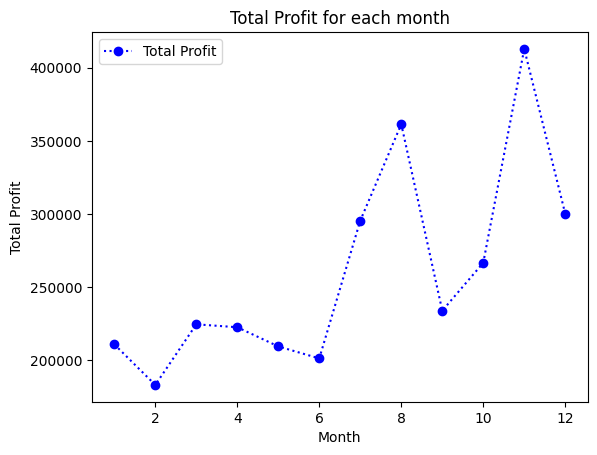

In [58]:
plt.plot(
    sales_df["month_number"],
    sales_df["total_profit"],
    linestyle="dotted",
    color="blue",
    marker="o",
    label="Total Profit",
)
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.title("Total Profit for each month")
plt.legend(loc="upper left")
plt.show()

### `Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

In [151]:
sales_df[sales_df["month_number"] == 3]

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
2,3,2140,1340,4550,9550,3550,1340,22470,224700


In [165]:
items_contri = (
    sales_df[sales_df["month_number"] == 3]
    .drop(columns=["month_number", "total_units", "total_profit"])
    .unstack()
    .droplevel(1)
)
items_contri

facecream      2140
facewash       1340
toothpaste     4550
bathingsoap    9550
shampoo        3550
moisturizer    1340
dtype: int64

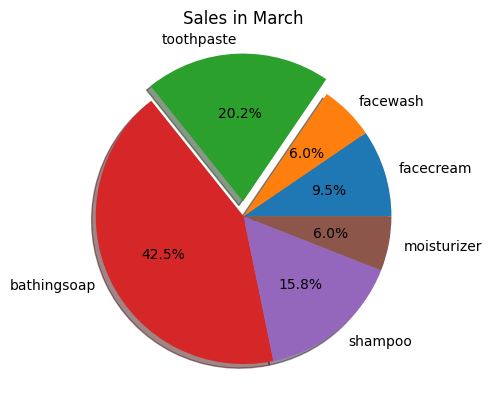

In [178]:
plt.pie(
    items_contri,
    autopct="%0.1f%%",
    labels=items_contri.index,
    explode=[0, 0, 0.1, 0, 0, 0],
    shadow=True,
)
plt.title("Sales in March")
plt.show()

### `Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

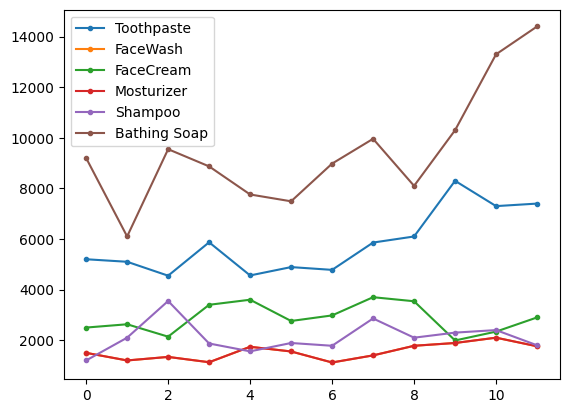

In [59]:
plt.plot(sales_df["toothpaste"], label="Toothpaste", marker=".")
plt.plot(sales_df["facewash"], label="FaceWash", marker=".")
plt.plot(sales_df["facecream"], label="FaceCream", marker=".")
plt.plot(sales_df["moisturizer"], label="Mosturizer", marker=".")
plt.plot(sales_df["shampoo"], label="Shampoo", marker=".")
plt.plot(sales_df["bathingsoap"], label="Bathing Soap", marker=".")
plt.legend()
plt.show()

### `Problem-9` Show Quarter wise Sales data for all products as multi Bar chart. Assume that the year is 2021.

In [ ]:
sales_df["date"] = pd.to_datetime(
    ["2021-{}-01".format(month) for month in sales_df["month_number"]]
)
sales_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,date
0,1,2500,1500,5200,9200,1200,1500,21100,211000,2021-01-01
1,2,2630,1200,5100,6100,2100,1200,18330,183300,2021-02-01
2,3,2140,1340,4550,9550,3550,1340,22470,224700,2021-03-01
3,4,3400,1130,5870,8870,1870,1130,22270,222700,2021-04-01
4,5,3600,1740,4560,7760,1560,1740,20960,209600,2021-05-01
5,6,2760,1555,4890,7490,1890,1555,20140,201400,2021-06-01
6,7,2980,1120,4780,8980,1780,1120,29550,295500,2021-07-01
7,8,3700,1400,5860,9960,2860,1400,36140,361400,2021-08-01
8,9,3540,1780,6100,8100,2100,1780,23400,234000,2021-09-01
9,10,1990,1890,8300,10300,2300,1890,26670,266700,2021-10-01


In [70]:
quarter_df = sales_df.groupby(sales_df["date"].dt.quarter)[
    [
        "facecream",
        "facewash",
        "toothpaste",
        "bathingsoap",
        "shampoo",
        "moisturizer",
        "total_units",
        "total_profit",
    ]
].sum()
quarter_df

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
date,,,,,,,,
1,7270,4040,14850,24850,6850,4040,61900,619000
2,9760,4425,15320,24120,5320,4425,63370,633700
3,10220,4300,16740,27040,6740,4300,89090,890900
4,7230,5750,23000,38000,6500,5750,97970,979700


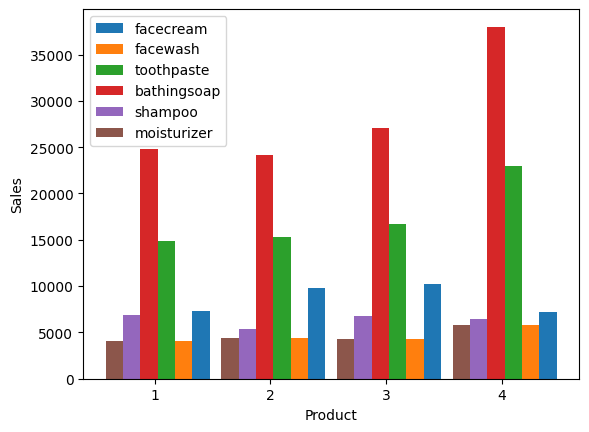

In [73]:
i = -1
for col in quarter_df.columns[0:6]:
    plt.bar([a + i for a in quarter_df.index], quarter_df[col], width=0.15, label=col)
    i = i - 0.15

plt.xticks(quarter_df.index - 1.4, quarter_df.index)
plt.xlabel("Product")
plt.ylabel("Sales")
plt.legend()
plt.show()

## Explanation of the Multi Bar Chart Logic

Your goal here is to show **quarter-wise sales for multiple products** on the **same plot**, such that:

* Each **quarter** appears once on the x-axis
* For every quarter, **multiple bars (products)** are shown side-by-side
* Each product has its own color and legend entry

Since **Matplotlib does not provide a direct grouped bar chart function**, we achieve this by **manually shifting the bar positions**.

---

## Step-by-Step Breakdown

### 1️⃣ Initial Offset Variable

```python
i = -1
```

* `i` represents the **horizontal offset** for bars
* This offset ensures that each product’s bar is placed **slightly left or right** of the quarter index
* Starting with a negative value shifts the first product’s bars to the **left**

---

### 2️⃣ Loop Through Product Columns

```python
for col in quarter_df.columns[0:6]:
```

* `quarter_df.columns[0:6]` selects **only product columns**
* This excludes columns like `total_units` and `total_profit`
* Each iteration plots **one product’s sales across all quarters**

---

### 3️⃣ Shifting Bars Horizontally

```python
plt.bar(
    [a + i for a in quarter_df.index],
    quarter_df[col],
    width=0.15,
    label=col
)
```

#### What’s happening here?

* `quarter_df.index` → quarters (1, 2, 3, 4)
* `[a + i for a in quarter_df.index]`:

  * Shifts bars **left or right**
  * Prevents overlapping
* `width=0.15`:

  * Keeps bars **thin enough** to fit multiple bars per quarter
* `label=col`:

  * Adds product name to the legend

📌 Each product is plotted **once**, but across all quarters.

---

### 4️⃣ Updating Offset for Next Product

```python
i = i - 0.15
```

* After plotting one product, we move further left
* This creates **side-by-side bars**
* Offset decreases by the same value as bar width to maintain spacing

📐 Visually, bars align like this per quarter:

```
| shampoo | soap | toothpaste | facewash | facecream |
```

---

### 5️⃣ Fixing X-Axis Tick Positions

```python
plt.xticks(quarter_df.index - 1.4, quarter_df.index)
```

Why this is needed:

* Since bars are shifted left using offsets, the **x-axis labels no longer align**
* `quarter_df.index - 1.4` re-centers the tick labels
* `quarter_df.index` are the actual labels (Q1, Q2, Q3, Q4)

This ensures:
✔ Quarters appear centered
✔ Bars stay grouped correctly

---

## What This Technique Is Called

✔ **Grouped Bar Chart**
✔ **Side-by-Side Bar Chart**
✔ **Multi-Bar Chart**

And it is achieved by:

* Manually adjusting bar positions using offsets
* Controlling bar width
* Re-aligning x-ticks

### `Problem-10` Plot Stacked Bar chart quarter wise for each product.

In [74]:
quarter_df

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
date,,,,,,,,
1,7270,4040,14850,24850,6850,4040,61900,619000
2,9760,4425,15320,24120,5320,4425,63370,633700
3,10220,4300,16740,27040,6740,4300,89090,890900
4,7230,5750,23000,38000,6500,5750,97970,979700


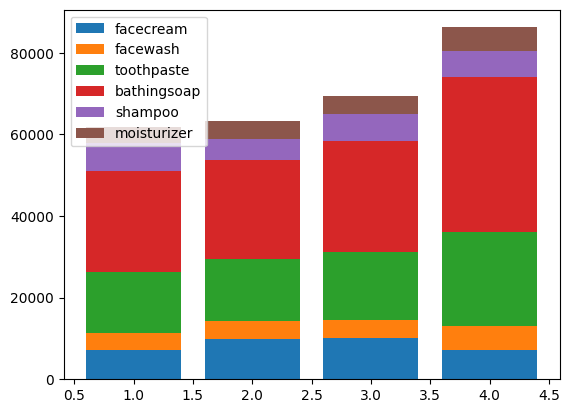

In [80]:
all_cols = []

for col in quarter_df.columns[0:6]:
    if len(all_cols) == 0:
        plt.bar(quarter_df.index, quarter_df[col], label=col)
    else:
        plt.bar(quarter_df.index, quarter_df[col], bottom=sum(all_cols), label=col)
    all_cols.append(quarter_df[col])

plt.legend()
plt.show()